In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import datetime as dt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing and cleaning vaccination data

In [2]:
#Read the vaccinations data
country_vaccinations = pd.read_csv('country_vaccinations.csv')
country_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
#Examine column attributes of the data set
print(country_vaccinations.columns)

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')


In [4]:
#Check the number of rows and columns
country_vaccinations.shape

(72312, 15)

In [5]:
#Check for missing data 
country_vaccinations.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     34366
people_vaccinated                      36307
people_fully_vaccinated                39063
daily_vaccinations_raw                 41284
daily_vaccinations                       366
total_vaccinations_per_hundred         34366
people_vaccinated_per_hundred          36307
people_fully_vaccinated_per_hundred    39063
daily_vaccinations_per_million           366
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [6]:
#Dropping columns that are not required for any analysis, here source_name and source_website
country_vaccinations.drop(['source_name', 'source_website'], axis = 1, inplace = True)
country_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [7]:
#Check the value counts in country column
country_vaccinations.value_counts('country')

country
Denmark             416
Latvia              416
Norway              415
United States       407
Canada              405
                   ... 
Saint Helena         92
Burundi              87
Pitcairn             85
Falkland Islands     67
Niue                 43
Length: 223, dtype: int64

In [8]:
#In country column, England,Scotland,Northern Ireland and Wales are part of UK, let us drop rows except UK
index_names = country_vaccinations[country_vaccinations.country.isin(['England', 'Scotland', 'Wales', 'Northern Ireland'])].index
country_vaccinations.drop(index_names, inplace = True)

In [9]:
#Extract number of vaccinations per capita for each country
country_vaccinations_grouped = country_vaccinations.groupby('country', as_index = False).total_vaccinations_per_hundred.max()
country_vaccinations_grouped.head()


,country,total_vaccinations_per_hundred
0,Afghanistan,12.56
1,Albania,87.38
2,Algeria,29.08
3,Andorra,151.57
4,Angola,37.40


## Importing and cleaning GDP data

In [10]:
#Read the GDP data
country_gdp = pd.read_csv('GDP_per_capita.csv')
country_gdp.head()

,country,2019
0,Aruba,NaN
1,Afghanistan,507.0
2,Angola,2791.0
3,Albania,5353.0
4,Andorra,40886.0


In [11]:
#Using describe to get the basic parameters of the data set
country_gdp.describe(include='all')

,country,2019
count,264,230.000000
unique,264,NaN
top,"Iran, Islamic Rep.",NaN
freq,1,NaN
mean,NaN,14876.117391
std,NaN,20246.662088
min,NaN,261.000000
25%,NaN,2118.500000
50%,NaN,6573.500000
75%,NaN,17435.500000


In [12]:
#Dropping rows with some data missing
country_gdp = country_gdp.dropna()
country_gdp.shape

(230, 2)

## Linear Regression

In [13]:
#Merging two different data sets
country_merged = pd.merge(country_gdp, country_vaccinations_grouped, on='country') 
country_merged

,country,2019,total_vaccinations_per_hundred
0,Afghanistan,507.0,12.56
1,Angola,2791.0,37.40
2,Albania,5353.0,87.38
3,Andorra,40886.0,151.57
4,United Arab Emirates,43103.0,233.09
...,...,...,...
159,Samoa,4324.0,132.62
160,Kosovo,4418.0,97.97
161,South Africa,6001.0,48.90
162,Zambia,1305.0,11.94


In [14]:
#Declaring dependent variable
targets = country_merged['total_vaccinations_per_hundred']
#Declaring independent variable
inputs = country_merged['2019']

In [15]:
#Transforming array from 1D to 2D
inputs = inputs.values.reshape(-1,1)
inputs.shape

(164, 1)

In [16]:
#Fitting the model
reg = LinearRegression()
reg.fit(inputs,targets)


LinearRegression()

In [17]:
#Point where estimated regression line crosses the y-axix
reg.intercept_

77.11740485814556

In [18]:
#Finding the regression coefficient
reg.coef_


array([0.00201935])

In [19]:
#Checks the R-squared value of the regression
reg.score(inputs,targets)

0.41049630836237017

## Scatter Plot


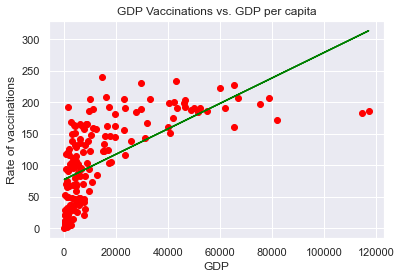

In [20]:
#Showing the scatter plot with a estimated regression line
plt.scatter(inputs, targets, color = "red")
plt.plot(inputs, reg.predict(inputs), color = "green")
plt.title("GDP Vaccinations vs. GDP per capita")
plt.xlabel("GDP")
plt.ylabel("Rate of vaccinations")
plt.show()